##Importing libraries

In [191]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.express as px

#Read the Data

In [204]:
health = pd.read_csv("/content/National Diabetes Insulin Pump Audit 2016-17, Specialist Service_health.csv")
gap = pd.read_csv("/content/SCS Staff Salaries data 30th June 2010_paygap.csv")
pollution = pd.read_csv("/content/scptb01-carbon-footprint-1990to2009_pollution.csv")
waste = pd.read_csv("/content/wrtb08_con_region_200702_WasteManagement.csv")
new_data = pd.concat([health, gap, pollution, waste])

In [193]:
new_data .head()

,Hospital/organisation code,Hospital Name,Number of people on Insulin pump,Number of people with Type 1 diabetes on an Insulin pump,Number of people with Type 2 and other diabetes,Number of people with Type 1 diabetes (overall not limited by pump use),Care Process Completion for those with Type 1 diabetes on an insulin pump,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,CO2 from UK produced goods and services and generated by households,CO2 embedded in imported goods and services,Government Office Region,Recycled aggregate and soil,Spread on registered exempt sites,"Waste entering licensed landfills (engineering, capping and disposal)",Landfill engineering,Landfill capping,Landfill disposal,Total arisings
0,NaN,NaN,NaN,NaN,NaN,NaN,HbA1c,NaN,NaN,Blood Pressure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,\nPercentage completed,Numerator,Denominator,\nPercentage completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,England,England,"9,735","9,365",370,"60,120",93.0,"8,710","9,365",91.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NDL,SUFFOLK GP FEDERATION (NDL),80,75,5,825,100.0,75,75,86.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NQV,BROMLEY HEALTHCARE (NQV),50,50,0,665,100.0,50,50,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Data Pre-processing

In [194]:
new_data.isnull().sum()

Hospital/organisation code                                                52
Hospital Name                                                             52
Number of people on Insulin pump                                          52
Number of people with Type 1 diabetes on an Insulin pump                  52
Number of people with Type 2 and other diabetes                           52
                                                                        ... 
Waste entering licensed landfills (engineering, capping and disposal)    124
Landfill engineering                                                     124
Landfill capping                                                         124
Landfill disposal                                                        124
Total arisings                                                           124
Length: 133, dtype: int64

In [195]:
traindrop=new_data.dropna()
print(len(traindrop.index))
print(traindrop.isnull().sum())

0
Hospital/organisation code                                               0.0
Hospital Name                                                            0.0
Number of people on Insulin pump                                         0.0
Number of people with Type 1 diabetes on an Insulin pump                 0.0
Number of people with Type 2 and other diabetes                          0.0
                                                                        ... 
Waste entering licensed landfills (engineering, capping and disposal)    0.0
Landfill engineering                                                     0.0
Landfill capping                                                         0.0
Landfill disposal                                                        0.0
Total arisings                                                           0.0
Length: 133, dtype: float64


In [196]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 9
Columns: 133 entries, Hospital/organisation code to Total arisings
dtypes: float64(14), object(119)
memory usage: 140.3+ KB


In [197]:
new_data.duplicated().sum()

0

In [198]:
df = new_data.drop(['Notes'], axis=1)

# Display the updated DataFrame
print("\nDataFrame after dropping 'Notes' column:")
print(df)


DataFrame after dropping 'Notes' column:
   Hospital/organisation code                Hospital Name  \
0                         NaN                          NaN   
1                         NaN                          NaN   
2                     England                      England   
3                         NDL  SUFFOLK GP FEDERATION (NDL)   
4                         NQV     BROMLEY HEALTHCARE (NQV)   
..                        ...                          ...   
5                         NaN                          NaN   
6                         NaN                          NaN   
7                         NaN                          NaN   
8                         NaN                          NaN   
9                         NaN                          NaN   

   Number of people on Insulin pump  \
0                               NaN   
1                               NaN   
2                             9,735   
3                                80   
4                 

In [199]:
df = df.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], axis=1)


In [200]:
df.head()

,Hospital/organisation code,Hospital Name,Number of people on Insulin pump,Number of people with Type 1 diabetes on an Insulin pump,Number of people with Type 2 and other diabetes,Number of people with Type 1 diabetes (overall not limited by pump use),Care Process Completion for those with Type 1 diabetes on an insulin pump,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,CO2 from UK produced goods and services and generated by households,CO2 embedded in imported goods and services,Government Office Region,Recycled aggregate and soil,Spread on registered exempt sites,"Waste entering licensed landfills (engineering, capping and disposal)",Landfill engineering,Landfill capping,Landfill disposal,Total arisings
0,NaN,NaN,NaN,NaN,NaN,NaN,HbA1c,NaN,NaN,Cholesterol,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,\nPercentage completed,Numerator,Denominator,\nPercentage completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,England,England,"9,735","9,365",370,"60,120",93.0,"8,555","9,185",83.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NDL,SUFFOLK GP FEDERATION (NDL),80,75,5,825,100.0,65,75,93.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NQV,BROMLEY HEALTHCARE (NQV),50,50,0,665,100.0,50,50,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 9
Columns: 129 entries, Hospital/organisation code to Total arisings
dtypes: float64(13), object(116)
memory usage: 136.1+ KB


#Pay gap data column drop

In [203]:
df_gap = gap.drop(['Notes'], axis=1)

# Display the updated DataFrame
print("\nDataFrame after dropping 'Notes' column:")
df_gap.head()


DataFrame after dropping 'Notes' column:


,Name (where agreed),Grade,Job title,FTE,Parent Department,Organisaton,Unit,Actual pay floor,Actual pay ceiling
0,Hannah Nixon,Grade 5,Partner,0.8,Ofgem,Ofgem,Ofgem Policy,80000,84999
1,Elizabeth Hillman,Grade 5,Director,1.0,Ofgem,Ofgem,Ofgem E-Serve,90000,94999
2,Curt Silver,Grade 5,Director,1.0,Ofgem,Ofgem,Ofgem E-Serve,90000,94999
3,David Ashbourne,Grade 5,Partner,1.0,Ofgem,Ofgem,Ofgem Policy,100000,104999
4,Rachel Fletcher,Grade 5,Partner,1.0,Ofgem,Ofgem,Ofgem Policy,100000,104999


##Health data null value drop

In [205]:
df_health = health.dropna(axis=1)

In [206]:
df_health.isnull().sum()

Care Process Completion for those with Type 1 diabetes on an insulin pump         0
Unnamed: 9                                                                        0
Unnamed: 12                                                                       0
Unnamed: 15                                                                       0
Unnamed: 18                                                                       0
Unnamed: 21                                                                       0
Unnamed: 24                                                                       0
Unnamed: 27                                                                       0
Unnamed: 30                                                                       0
Care Process Completion for those with Type 1 diabetes not on an insulin pump     0
Unnamed: 36                                                                       0
Unnamed: 39                                                                 

##Descriptive Analysis

In [207]:
new_data.describe()

,FTE,Actual pay floor,Actual pay ceiling,Notes,Year,Units,CO2 embedded in imported goods and services,Recycled aggregate and soil,Spread on registered exempt sites,"Waste entering licensed landfills (engineering, capping and disposal)",Landfill engineering,Landfill capping,Landfill disposal,Total arisings
count,20.000000,20.000000,20.000000,0.0,30.000000,0.0,20.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.00000
mean,0.980000,120750.000000,125749.000000,NaN,2002.833333,NaN,246997.700000,9.27000,3.080000,5.530000,0.840000,1.100000,3.63000,17.91000
std,0.061559,34077.118423,34077.118423,NaN,6.983149,NaN,78715.118727,13.12225,4.392114,7.873027,1.187153,1.527525,5.16614,25.30698
min,0.800000,80000.000000,84999.000000,NaN,1990.000000,NaN,147271.000000,1.90000,0.700000,1.100000,0.300000,0.300000,0.50000,4.80000
25%,1.000000,100000.000000,104999.000000,NaN,1997.250000,NaN,175715.750000,4.82500,1.025000,2.250000,0.400000,0.450000,1.35000,9.57500
50%,1.000000,105000.000000,109999.000000,NaN,2004.500000,NaN,224105.500000,5.70000,2.000000,3.450000,0.500000,0.600000,2.35000,10.15000
75%,1.000000,135000.000000,139999.000000,NaN,2008.000000,NaN,334118.000000,6.45000,2.375000,3.875000,0.575000,0.875000,2.50000,11.52500
max,1.000000,205000.000000,209999.000000,NaN,2014.000000,NaN,369656.000000,46.40000,15.400000,27.700000,4.200000,5.400000,18.10000,89.60000


In [208]:
health.describe()

,Hospital/organisation code,Hospital Name,Number of people on Insulin pump,Number of people with Type 1 diabetes on an Insulin pump,Number of people with Type 2 and other diabetes,Number of people with Type 1 diabetes (overall not limited by pump use),Care Process Completion for those with Type 1 diabetes on an insulin pump,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,HbA1c values,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107
count,82,82,82,82,82,82,84,83,83,84,...,83,84,83,83,84,83,83,84,83,83
unique,82,82,53,49,10,73,41,47,49,42,...,74,62,44,72,59,49,53,62,75,44
top,England,England,35,115,5,665,100.0,80,115,100.0,...,580,18.2,110,485,69.9,115,13.6,69.5,325,19.2
freq,1,1,4,5,42,2,33,5,5,29,...,3,3,7,2,3,5,5,3,2,5


In [162]:
pollution.describe()

,Year,Units,CO2 embedded in imported goods and services
count,20.00000,0.0,20.000000
mean,1999.50000,NaN,246997.700000
std,5.91608,NaN,78715.118727
min,1990.00000,NaN,147271.000000
25%,1994.75000,NaN,175715.750000
50%,1999.50000,NaN,224105.500000
75%,2004.25000,NaN,334118.000000
max,2009.00000,NaN,369656.000000


In [147]:
waste.describe()

,Recycled aggregate and soil,Spread on registered exempt sites,"Waste entering licensed landfills (engineering, capping and disposal)",Landfill engineering,Landfill capping,Landfill disposal,Total arisings,Year
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.00000,10.00000
mean,9.27000,3.080000,5.530000,0.840000,1.100000,3.63000,17.91000,2009.50000
std,13.12225,4.392114,7.873027,1.187153,1.527525,5.16614,25.30698,3.02765
min,1.90000,0.700000,1.100000,0.300000,0.300000,0.50000,4.80000,2005.00000
25%,4.82500,1.025000,2.250000,0.400000,0.450000,1.35000,9.57500,2007.25000
50%,5.70000,2.000000,3.450000,0.500000,0.600000,2.35000,10.15000,2009.50000
75%,6.45000,2.375000,3.875000,0.575000,0.875000,2.50000,11.52500,2011.75000
max,46.40000,15.400000,27.700000,4.200000,5.400000,18.10000,89.60000,2014.00000


#COLUMN RENAME

In [209]:
# Create a dictionary to rename the columns
careProcess = {}
for name in df.columns:
    if name.startswith('Unnamed:'):
        careProcess[name] = ''
    else:
        careProcess[name] = name

# Rename the columns
df = df.rename(columns=careProcess)

In [210]:
df_health.head()

,Care Process Completion for those with Type 1 diabetes on an insulin pump,Unnamed: 9,Unnamed: 12,Unnamed: 15,Unnamed: 18,Unnamed: 21,Unnamed: 24,Unnamed: 27,Unnamed: 30,Care Process Completion for those with Type 1 diabetes not on an insulin pump,...,Unnamed: 78,Target achievement for those with Type 1 diabetes not on an insulin pump,Unnamed: 84,Unnamed: 87,Unnamed: 90,Unnamed: 93,Unnamed: 96,Unnamed: 99,HbA1c values,Unnamed: 105
0,HbA1c,Blood Pressure,Cholesterol,Serum Creatinine,Urine Albumin,Foot Surveillance,BMI,Smoking,All 8 Care Processes,HbA1c,...,All 3 Treatment Targets,HbA1c < 48,HbA1c <= 58,HbA1c <= 86,Blood Pressure <= 140/80,Cholesterol <4,Cholesterol <5,All 3 Treatment Targets,Hospital - People with Type1 diabetes on pump,Hospital - People with Type1 diabetes not on pump
1,\nPercentage completed,\nPercentage completed,\nPercentage completed,\nPercentage completed,\nPercentage completed,\nPercentage completed,\nPercentage completed,\nPercentage completed,\nPercentage completed,\nPercentage completed,...,\nPercentage achieved,\nPercentage achieved,\nPercentage achieved,\nPercentage achieved,\nPercentage achieved,\nPercentage achieved,\nPercentage achieved,\nPercentage achieved,Average (mean) HbA1c,Average (mean) HbA1c
2,93.0,91.4,83.9,89.4,63.6,70.8,81.8,81.0,41.7,90.9,...,20.5,8.4,29.0,83.8,70.7,28.9,69.5,16.5,64.7,69.6
3,100.0,86.7,93.3,100.0,80.0,73.3,86.7,86.7,53.3,95.3,...,33.3,9.2,30.3,81.7,78.2,24.6,63.8,16.3,60.4,70.1
4,100.0,100.0,90.0,80.0,30.0,90.0,90.0,80.0,20.0,89.4,...,22.2,10.9,40.0,89.1,67.2,23.8,70.5,21.6,58.7,65.1


##DATA VISUALIZATION of DF_GAP data

> Indented block



<AxesSubplot:ylabel='Frequency'>

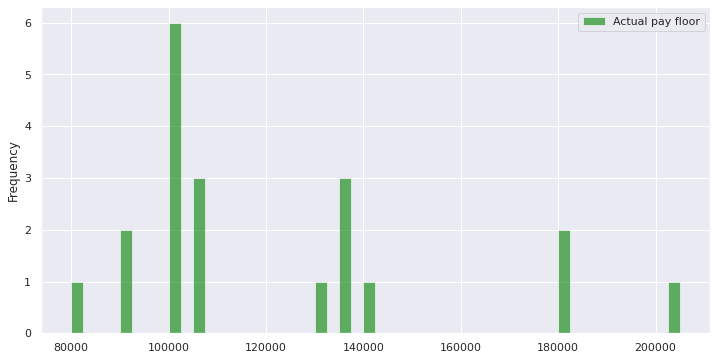

In [211]:
df_gap['Actual pay floor'].plot(kind='hist', bins=50, figsize=[12,6], alpha=.6, legend=True, color = 'green')

<AxesSubplot:ylabel='Frequency'>

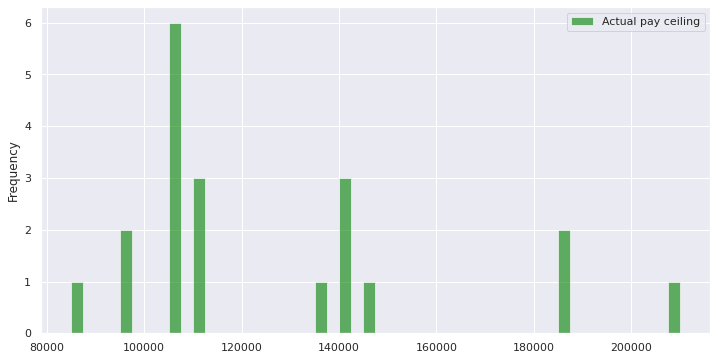

In [212]:
df_gap['Actual pay ceiling'].plot(kind='hist', bins=50, figsize=[12,6], alpha=.6, legend=True, color = 'green')

In [213]:
df_gap.nlargest(10, 'Actual pay ceiling')

,Name (where agreed),Grade,Job title,FTE,Parent Department,Organisaton,Unit,Actual pay floor,Actual pay ceiling
19,Alistair Buchanan,CEO,Chief Executive,1.0,Ofgem,Ofgem,Ofgem Group,205000,209999
17,Steve Smith,Grade 3,Senior Partner,1.0,Ofgem,Ofgem,Ofgem Policy,180000,184999
18,Andrew Wright,Grade 3,Senior Partner,1.0,Ofgem,Ofgem,Ofgem Policy,180000,184999
16,David Pimm,Grade 3,Group Finance Director,1.0,Ofgem,Ofgem,Ofgem E-Serve,140000,144999
13,Stuart Cook,Grade 3,Senior Partner,1.0,Ofgem,Ofgem,Ofgem Policy,135000,139999
14,Roy Field,Grade 3,Secretariat,1.0,Ofgem,Ofgem,Ofgem Group,135000,139999
15,Sarah Harrison,Grade 3,Senior Partner,1.0,Ofgem,Ofgem,Ofgem Policy,135000,139999
12,Robert Hull,Grade 3,Managing Director,1.0,Ofgem,Ofgem,Ofgem E-Serve,130000,134999
9,Martin Crouch,Grade 5,Partner,1.0,Ofgem,Ofgem,Ofgem Policy,105000,109999
10,Maxine Frerk,Grade 5,Partner,1.0,Ofgem,Ofgem,Ofgem Policy,105000,109999


In [214]:
df_gap.nsmallest(10, 'Actual pay ceiling')

,Name (where agreed),Grade,Job title,FTE,Parent Department,Organisaton,Unit,Actual pay floor,Actual pay ceiling
0,Hannah Nixon,Grade 5,Partner,0.8,Ofgem,Ofgem,Ofgem Policy,80000,84999
1,Elizabeth Hillman,Grade 5,Director,1.0,Ofgem,Ofgem,Ofgem E-Serve,90000,94999
2,Curt Silver,Grade 5,Director,1.0,Ofgem,Ofgem,Ofgem E-Serve,90000,94999
3,David Ashbourne,Grade 5,Partner,1.0,Ofgem,Ofgem,Ofgem Policy,100000,104999
4,Rachel Fletcher,Grade 5,Partner,1.0,Ofgem,Ofgem,Ofgem Policy,100000,104999
5,NaN,Grade 5,Director,1.0,Ofgem,Ofgem,Ofgem Group,100000,104999
6,Stephanie McGregor,Grade 5,Director,1.0,Ofgem,Ofgem,Ofgem E-Serve,100000,104999
7,Paul McIntyre,Grade 3,Managing Director,0.8,Ofgem,Ofgem,Ofgem E-Serve,100000,104999
8,Colin Sausman,Grade 5,Director,1.0,Ofgem,Ofgem,Ofgem E-Serve,100000,104999
9,Martin Crouch,Grade 5,Partner,1.0,Ofgem,Ofgem,Ofgem Policy,105000,109999


##Correlation matrix of PAY_GAP data

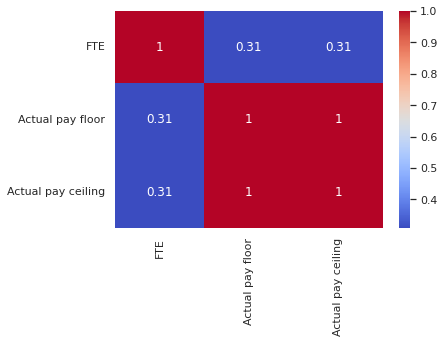

In [215]:

corr=df_gap.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Show the plot
plt.show()

##WASTE data analysis

## BOX PLOT

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



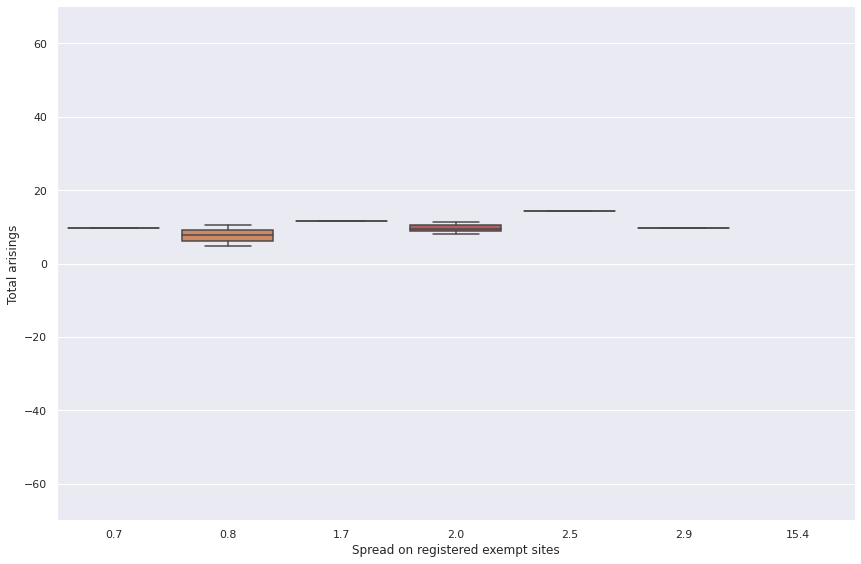

In [216]:
with sns.axes_style("darkgrid"):
    ax = sns.factorplot(kind='box', y='Total arisings', x='Spread on registered exempt sites',
                   data=waste, size=8, aspect=1.5, legend_out=False)
    ax.set(ylim=(-70, 70))

##HISTOGRAM

In [217]:
px.histogram(waste,x="Government Office Region",title="Waste Management under different Government")

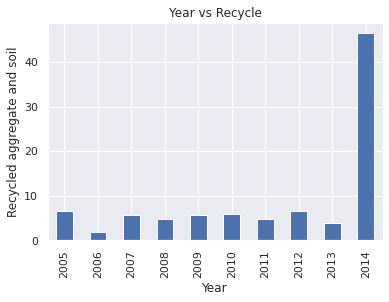

In [218]:
grouped_df = waste.groupby('Year')['Recycled aggregate and soil'].sum()

# create the bar plot
grouped_df.plot(kind='bar')

# set the plot title and axis labels
plt.title('Year vs Recycle')
plt.xlabel('Year')
plt.ylabel('Recycled aggregate and soil')

# show the plot
plt.show()

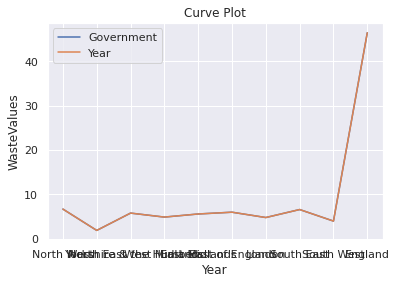

In [219]:
x_col = 'Year'
y_col1 = 'Government Office Region'
y_col2 = 'Recycled aggregate and soil'

# create the curve plot
plt.plot(waste['Government Office Region'], waste['Recycled aggregate and soil'], label='Government')
plt.plot(waste['Government Office Region'], waste['Recycled aggregate and soil'], label='Year')

# set the plot title and axis labels
plt.title('Curve Plot')
plt.xlabel('Year')
plt.ylabel('WasteValues')

# add a legend to the plot
plt.legend()

# show the plot
plt.show()

##Correlation matrix of Waste data

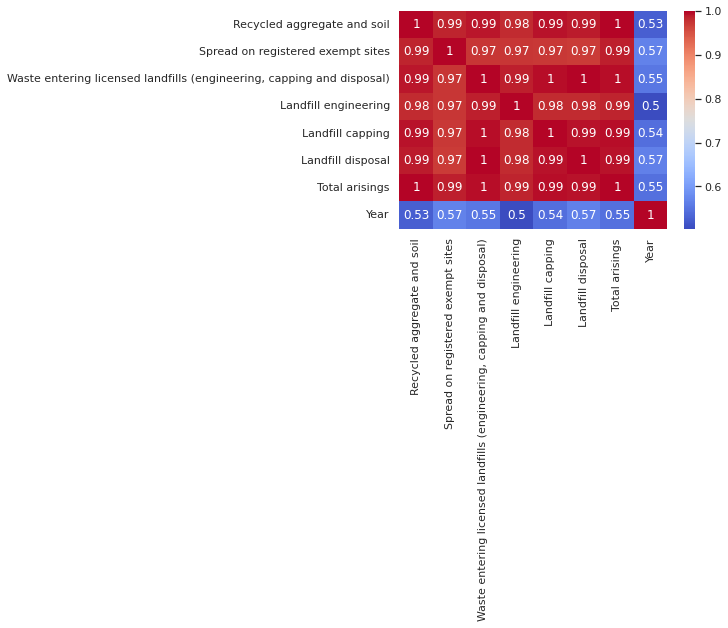

In [220]:
corr=waste.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Show the plot
plt.show()

##CarbonFootprint (Pollution data) analysis

In [221]:
# Convert the 'CO2 embedded in imported goods and services' column from string to numeric
pollution['CO2 embedded in imported goods and services'] = pd.to_numeric(pollution['CO2 embedded in imported goods and services'])

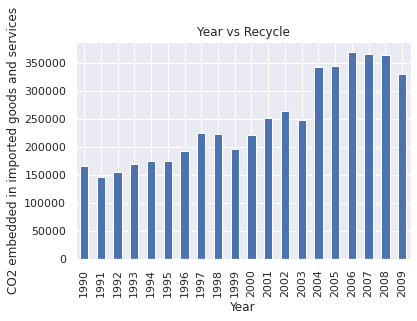

In [222]:
grouped_df = pollution.groupby('Year')['CO2 embedded in imported goods and services'].sum()

# create the bar plot
grouped_df.plot(kind='bar')

# set the plot title and axis labels
plt.title('Year vs Recycle')
plt.xlabel('Year')
plt.ylabel('CO2 embedded in imported goods and services')

# show the plot
plt.show()

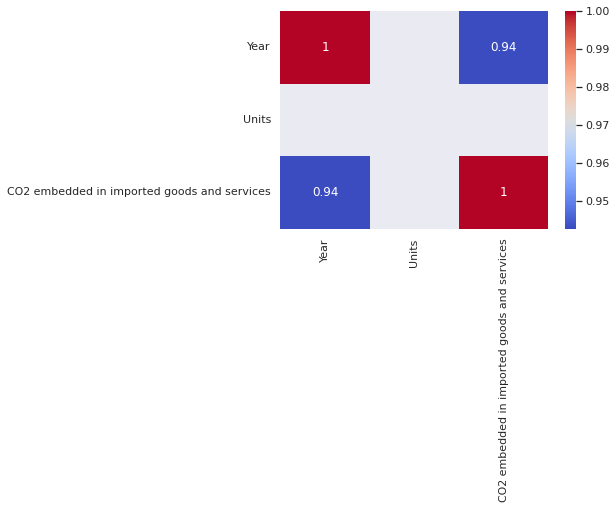

In [223]:
corr=pollution.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Show the plot
plt.show()

<AxesSubplot:ylabel='Frequency'>

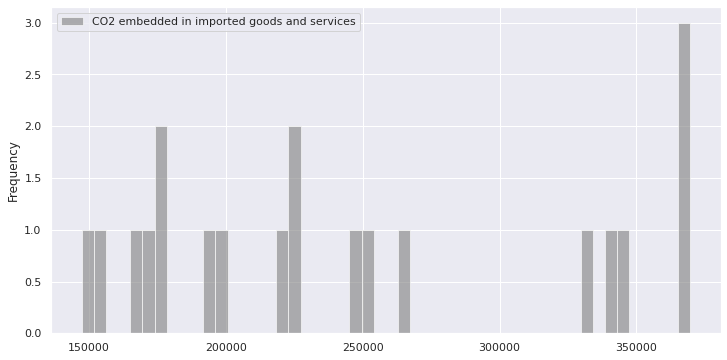

In [224]:
pollution['CO2 embedded in imported goods and services'].plot(kind='hist', bins=50, figsize=[12,6], alpha=.6, legend=True, color = 'grey')

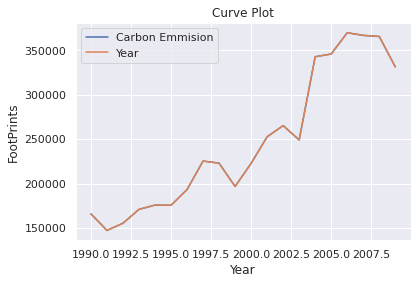

In [225]:
x_col = 'Geography'
y_col1 = 'Year'
y_col2 = 'CO2 embedded in imported goods and services'

# create the curve plot
plt.plot(pollution['Year'], pollution['CO2 embedded in imported goods and services'], label='Carbon Emmision')
plt.plot(pollution['Year'], pollution['CO2 embedded in imported goods and services'], label='Year')

# set the plot title and axis labels
plt.title('Curve Plot')
plt.xlabel('Year')
plt.ylabel('FootPrints')

# add a legend to the plot
plt.legend()

# show the plot
plt.show()

In [226]:

scatter = [go.Scatter(x = pollution['Year'],
                      y = pollution['CO2 embedded in imported goods and services'],
                      mode ='markers')] 

fig = go.Figure(scatter)

iplot(fig)

##new_data analysis

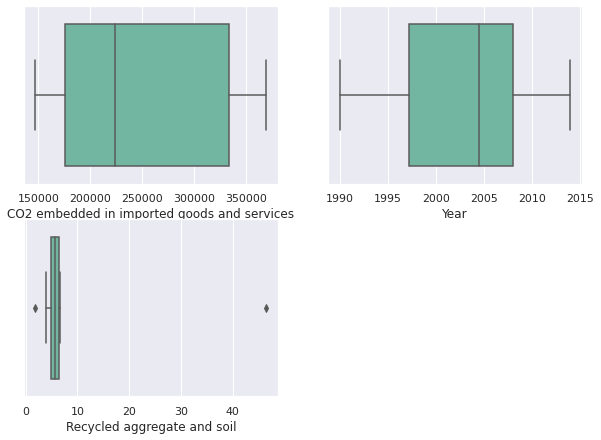

In [227]:
plt.figure(figsize = (10,15))
for i,col in enumerate(['CO2 embedded in imported goods and services', 'Year', 'Recycled aggregate and soil']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = new_data ,palette='Set2')
plt.show()

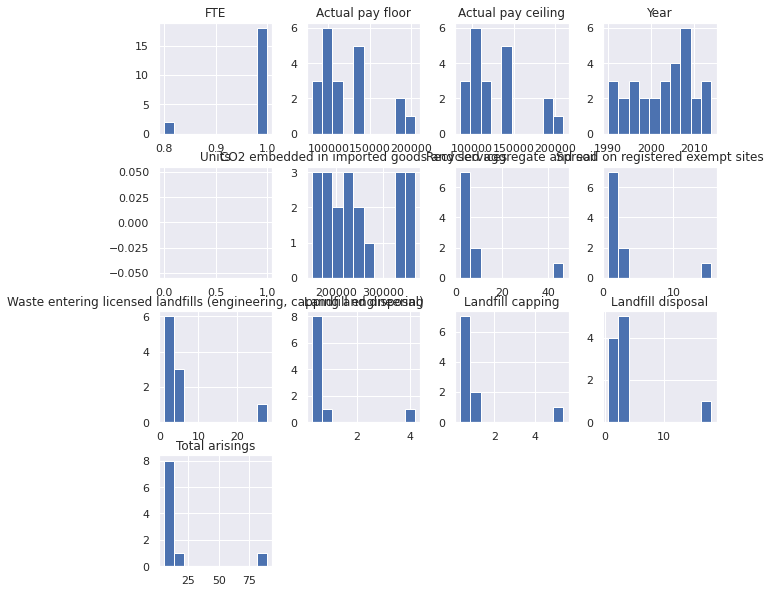

In [228]:
sns.set()
df.hist(figsize=(10,10))
plt.show()

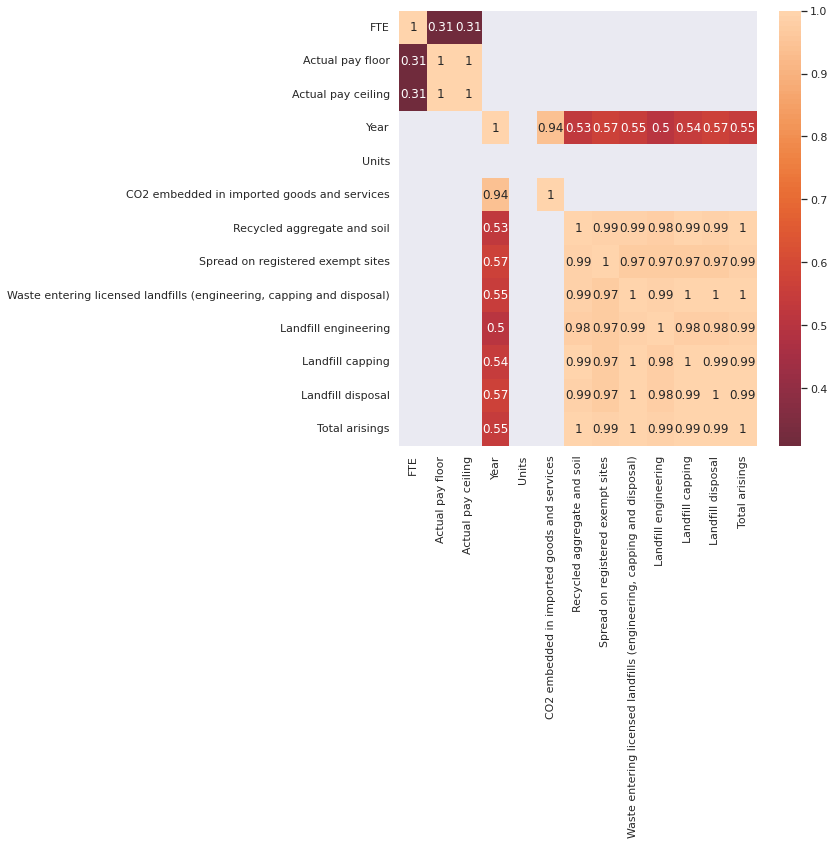

In [229]:
corrmat= df.corr()
plt.figure(figsize=(8,8))  
sns.heatmap(corrmat,annot=True, center=0)
plt.show()